# WeRateDogs Project- Wrangling & Analyzing Twitter Data

### By Eyong, Wofai Alfred

# Introduction

The we rate dogs project is a project aimed at wrangling data from the twitter account 'WeRateDogs' with the aim of creating analysis, trustworthy insights and visualizations. Results from these analysis will have the potential to trigger needed business growth and development. 
The Twitter archive holds very basic tweet information, creating the need for data scrapping from twitter for more information.
For a wholesome project, I will gather, asses and clean the Twitter data derived from merging 3 distinct datasets.


In [54]:
#importing python libraries to be used
import pandas as pd
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as def_timer
import PIL.Image
from io import BytesIO
from PIL import Image
%matplotlib inline

# 1: Gathering Data

Here, i gather all three pieces of data as described below in the "Data Gathering" section in the wrangle_act.ipynb notebook.

They include

i. The WeRateDogs Twitter archive

ii. The tweet image predictions

iii. Additional data from the Twitter API



1. **The WeRateDogs Twitter archive**


In [55]:
#Read data from manually downloaded file into a pandas DataFrame.
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. **The tweet image predictions**

The (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [56]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as images:
    images.write(response.content)


In [57]:
#Read TSV file
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )

In [58]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. **Additional data from the Twitter API**

Gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [59]:


consumer_key = consumer_key1
consumer_secret = consumer_secret1
access_token = access_token1
access_secret = access_secret1


#Authentication process
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#Api insert
#second arguement ensures the api sleeps when it reaches set limit.
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [8]:

tweet_count = []
failed_tweet_count = []
start = def_timer()

with open('tweet_json.txt', 'w') as file: 
    for tweet_id in list(df['tweet_id']): 
        try: 
            tweet_status = api.get_status(tweet_id,tweet_mode='extended') 
            json.dump(tweet_status._json, file)
            file.write('\n')
            tweet_count.append(tweet_id) 
        except Exception as e: 
            failed_tweet_count.append(tweet_id)
            
            
end= def_timer()
print(end-start)
print(failed_tweet_count)
print(tweet_count)


Rate limit reached. Sleeping for: 83


2412.080571358
[888202515573088257, 875097192612077568, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 856330835276025856, 851953902622658560, 851861385021730816, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 766864461642756096, 759923798737051648, 759566828574212096, 754011816964026368, 752568224206688256, 741793263812808706, 716730379797970944, 680055455951884288]
[892420643555336193, 892177421306343426, 891815181378084864, 891689557279858688, 891327558926688256, 891087950875897856, 890971913173991426, 890729181411237888, 890609185150312448, 890240255349198849, 890006608113172480, 889880896479866881, 889665388333682689, 889638837579907072, 889531135344209921, 889278841981685760, 888

In [60]:
#Read Json file
tweets = pd.read_json('tweet_json.txt', lines = True, encoding='utf-8')

In [61]:
#Convert to CSV
tweets.to_csv('tweets.csv', index = False)
tweets.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN



# 2: ACCESSING DATA

After gathering the three expected datasets, i assess them visually and programmatically for quality and tidiness issues. 



### *Visual assessment*

In [62]:
#Visually accessing the Twitter archive data
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [63]:
#Visually accessing the tweet image predictions data
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [64]:
##Visually accessing the data from Twitter Api.
tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2319,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2320,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2321,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### *Programmatic assessment*

1. **Twitter Archive data**

In [65]:
#Randomly sample 30 different rows in the dataset
df.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
741,780496263422808064,NaN,NaN,2016-09-26 19:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bell. She likes holding...,7.424232e+17,4.196984e+09,2016-06-13 18:27:32 +0000,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None
2096,670755717859713024,NaN,NaN,2015-11-29 00:06:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gin &amp; Tonic. They're having a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670755717...,9,10,Gin,None,None,None,None
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never seen a dog so genuinely happy about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384...,12,10,None,None,None,None,None
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harvey. He's stealthy af. 10/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971...,10,10,Harvey,None,None,None,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,None,None,None


In [66]:
#Identify the total number of rows and columns
df.shape

(2356, 17)

In [67]:
#Identify column names, data types per column and the presence or absence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [68]:
#Highlight important summary statistics for dataset
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [69]:
#Identify duplication amongst all columns
df.duplicated().sum()

0

In [70]:
#Identify tweet_id duplication as it is the primary key in this dataset 
df['tweet_id'].duplicated().sum()

0

In [71]:
#Check for unique rating_denominator values as min and max statistics shows 0 and 170 respectively
df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [72]:
#Identify archived data tweet source and its count
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

2. **Image prediction data**

In [73]:
#Randomly sample 30 different rows in the dataset
image_prediction.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
709,685268753634967552,https://pbs.twimg.com/media/CYKQS0xUQAEOptC.jpg,1,pug,0.999044,True,Norwegian_elkhound,0.000547,True,bull_mastiff,0.000235,True
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,collie,0.285555,True,Border_collie,0.217306,True,Saint_Bernard,0.143245,True
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
769,689283819090870273,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch_terrier,0.267979,True,affenpinscher,0.199619,True,cairn,0.127469,True
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True


In [74]:
#Identify the total number of rows and columns
image_prediction.shape

(2075, 12)

In [75]:
#Identify column names, data types per column and the presence or absence of missing values
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
#Highlight important summary statistics for dataset
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
#Identify duplication across all columns
image_prediction.duplicated().sum()

0

In [78]:
#Identify duplication within the tweet_id column
image_prediction['tweet_id'].duplicated().sum()

0

In [79]:
#Identify duplication within the jpg_url column
image_prediction['jpg_url'].duplicated().sum()

66

In [80]:
#Identify tweet_id duplication as it is the primary key in this dataset 
image_prediction['tweet_id'].duplicated().sum()

0

In [81]:
#Identify first prediction values
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [82]:
#Identify second prediction values
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [83]:
#Identify third prediction values
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

3. **Twitter Api data**

In [84]:
#Randomly sample 30 different rows in the dataset
tweets.sample(30)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1044,2016-06-06 01:02:55+00:00,739623569819336705,739623569819336704,Here's a doggo that don't need no human. 12/10...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2305,2015-11-16 04:02:55+00:00,666104133288665088,666104133288665088,Not familiar with this breed. No tail (weird)....,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666104129232740352, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
514,2016-12-09 06:17:20+00:00,807106840509214720,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 807106774843039744, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
394,2017-01-21 18:26:02+00:00,822872901745569793,822872901745569792,Here's a super supportive puppo participating ...,False,"[0, 87]","{'hashtags': [{'text': 'WomensMarch', 'indices...","{'media': [{'id': 822872859181809664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
24,2017-07-18 00:07:08+00:00,887101392804085760,887101392804085760,This... is a Jubilant Antarctic House Bear. We...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887101385971384320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1347,2016-02-21 23:13:01+00:00,701545186879471618,701545186879471616,Meet Millie. She's practicing her dive form fo...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 701545177110937600, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
489,2016-12-24 01:16:12+00:00,812466873996607488,812466873996607488,This is Mary. She's desperately trying to recr...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 812466868514619392, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
144,2017-05-12 00:46:44+00:00,862831371563274240,862831371563274240,This is Zooey. She's the world's biggest fan o...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 862831346963447808, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
937,2016-07-05 17:31:49+00:00,750381685133418496,750381685133418496,13/10 such a good doggo\n@spaghemily,False,"[0, 35]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.501805e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
247,2017-03-17 15:51:22+00:00,842765311967449089,842765311967449088,Meet Indie. She's not a fan of baths but she's...,False,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 842765306540052480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [85]:
#Identify the total number of rows and columns
tweets.shape

(2323, 32)

In [86]:
#Identify column names, data types per column, the presence or absence of missing values, and useful columns to be harvested
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2323 non-null   datetime64[ns, UTC]
 1   id                             2323 non-null   int64              
 2   id_str                         2323 non-null   int64              
 3   full_text                      2323 non-null   object             
 4   truncated                      2323 non-null   bool               
 5   display_text_range             2323 non-null   object             
 6   entities                       2323 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2323 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [87]:
#Highlight important summary statistics for dataset
tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.323000e+03,2.323000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2323.000000,2323.000000,2191.0,2191.0,2.400000e+01,2.400000e+01
mean,7.417418e+17,7.417418e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2454.730521,7013.934998,0.0,0.0,8.127198e+17,8.127198e+17
std,6.820823e+16,6.820823e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4159.101347,10905.099198,0.0,0.0,6.118454e+16,6.118454e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.780222e+17,6.780222e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,492.000000,1217.500000,0.0,0.0,7.845901e+17,7.845901e+17
50%,7.177900e+17,7.177900e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1142.000000,3031.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986547e+17,7.986547e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2841.500000,8556.000000,0.0,0.0,8.583570e+17,8.583570e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,70172.000000,143987.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [88]:
#Identify retweet_status count
tweets['retweeted_status'].count()
#tweets.retweeted_status.value_counts()

160

In [89]:
#Identify retweeted tweets count
tweets['retweeted'].value_counts()

False    2323
Name: retweeted, dtype: int64

In [90]:
#Identify the different languages tweets occured in
tweets['lang'].value_counts()

en     2305
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [91]:
tweets['id'].duplicated().sum()

0

In [92]:
#Identify tweet's source and its count
tweets['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2190
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

# Data Quality Issues



- In the rating_denominator column of the Twitter Archive data, values above 10 exist
- Original tweets only are needed for analysis. Retweeted tweets are not meant to be considered
- unidentifiable missing values in doggo,floofer,pupper and puppo columns
- Duplicate values are observed(jpg_url column)
- Image prediction and confidence levels can be identified and highlighted to make analysis easier
- Nondescriptive column names (p1, p2)
- Inconsistent tweet id column name (tweets dataset)
- Some columns will not be useful for expected analysis
- Inaccurate data type (timestamp)
- The sources column in the master dataset needs to be stripped of its html tags.


# Data Tidiness Issues

- doggo,floofer,pupper,puppo values can be held in one column
- Timestamp column can be divided into three distinct columns (day, month, year)
- All 3 datasets can be merged to form one master dataset


# 3: DATA CLEANING

I Clean all the issues i documented while assessing, using the define-code-test framework and i ensure it is clearly documented. 

In [93]:
#Make a copy of all 3 datasets to preserve each original dataset
df_clean = df.copy()
image_prediction_clean = image_prediction.copy()
tweets_clean = tweets.copy()

# Data Quality Issues

### Define

**In the rating_denominator column, values above 10 exist**

Convert all values in the rating_deniminator column to 10 using a for loop


### Code

In [94]:
for data in df_clean.rating_denominator:
    df_clean.rating_denominator=10.0

### Test

In [95]:
def rating_deniminator():
    '''identify wrong denominator values in dataset'''
    d = df_clean.query('rating_denominator > 10')
    return d
rating_deniminator()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [96]:
# Check for the presence of values greater than 10 in the rating_denominator column
sum(df_clean['rating_denominator']>10)

0

In [97]:
# Check for the presence of values less than 10 in the rating_denominator column
sum(df_clean['rating_denominator']<10)

0

### Define
**Original tweets only**

Eradicate retweeted tweets from twitter archive data and tweets data, leaving only original tweets

### Code

In [98]:
#filter out the values using the retweeted_status_user_id and in_reply_to_status_id column 
df_clean=df_clean[df_clean['retweeted_status_user_id'].isnull()]
df_clean=df_clean[df_clean['in_reply_to_status_id'].isnull()]

### Test

In [99]:
sum(df_clean.retweeted_status_user_id.value_counts())

0

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   float64
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Code

In [101]:
#Filter out retweets using the retweeted_status, in_reply_to_status_id and quoted_status_id columns
tweets_clean=tweets_clean[tweets_clean['retweeted_status'].isnull()]
tweets_clean=tweets_clean[tweets_clean['in_reply_to_status_id'].isnull()]
tweets_clean=tweets_clean[tweets_clean['quoted_status_id'].isnull()]

### Test 

In [103]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2322
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2063 non-null   datetime64[ns, UTC]
 1   id                             2063 non-null   int64              
 2   id_str                         2063 non-null   int64              
 3   full_text                      2063 non-null   object             
 4   truncated                      2063 non-null   bool               
 5   display_text_range             2063 non-null   object             
 6   entities                       2063 non-null   object             
 7   extended_entities              1962 non-null   object             
 8   source                         2063 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

### Define
**unidentifiable missing values in doggo,floofer,pupper and puppo columns**

This issue will be dealt with as i melt the columns in the data tidying section

### Define

**66 Duplicate values are observed(jpg_url column)**

Drop the duplicate values

### Code

In [104]:
#drop the duplicate jpg_url values
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='first')

### Test

In [105]:
#Confirm the absense of duplicated values
sum(image_prediction_clean['jpg_url'].duplicated())

0

### Define
**Image prediction and confidence levels can be identified and highlighted to make analysis easier**
 
Clearly highlight the Image prediction and confidence levels.

### Code

In [106]:
#Identify the dog type using the first true prediction
#Create two empty lists to hold the dog types and the confidence level
dog_type = []
confidence_level = []


def predict(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_level.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_level.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_level.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('failed')
        confidence_level.append('failed')


#Ensure the function iS applied to all required values in the selected series, in this case, the column using the .apply() function.    
image_prediction_clean.apply(predict, axis=1)

#create two new columns to hold the generated lists
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_level '] = confidence_level


#Delete rows that failed to meet if_elif_else statement
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'failed']



C:\Users\fai\AppData\Local\Temp\ipykernel_19760\4257514954.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean['dog_type'] = dog_type
C:\Users\fai\AppData\Local\Temp\ipykernel_19760\4257514954.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean['confidence_level '] = confidence_level


### Test

In [107]:
#Check the column names and confirm the presence of the two newly created columns
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1691 non-null   int64  
 1   jpg_url            1691 non-null   object 
 2   img_num            1691 non-null   int64  
 3   p1                 1691 non-null   object 
 4   p1_conf            1691 non-null   float64
 5   p1_dog             1691 non-null   bool   
 6   p2                 1691 non-null   object 
 7   p2_conf            1691 non-null   float64
 8   p2_dog             1691 non-null   bool   
 9   p3                 1691 non-null   object 
 10  p3_conf            1691 non-null   float64
 11  p3_dog             1691 non-null   bool   
 12  dog_type           1691 non-null   object 
 13  confidence_level   1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### Define

**Nondescriptive column names (p1, p2)**

This issue has been dealt with in number above. By creating a special column to hold the different dog types and further dropping these columns, i have eliminated these column names but transfered their information to a properly labelled column.

### Define

**Tweet id column name is not consistent across all datasets**

Change id column name to tweet_id to ensure consistency across the three datasets

### Code

In [108]:
#rename the id column
tweets_clean = tweets_clean.rename(columns={'id':'tweet_id'})

### Test

In [109]:
#Check for the new column name which replaces the old
tweets_clean['tweet_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2063 entries, 0 to 2322
Series name: tweet_id
Non-Null Count  Dtype
--------------  -----
2063 non-null   int64
dtypes: int64(1)
memory usage: 32.2 KB


## Define

**Some columns will not be useful for expected analysis**

Drop unuseful columns from datasets

### Code

In [110]:
#Drop twitter archive columns that will not be needed for analysis
df_clean = df_clean.drop([             'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

C:\Users\fai\AppData\Local\Temp\ipykernel_19760\3527625407.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_clean = df_clean.drop([             'in_reply_to_status_id',


In [111]:
#drop image prediction data columns that will not be needed
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


C:\Users\fai\AppData\Local\Temp\ipykernel_19760\3926409844.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1',


In [112]:
#Drop tweets data columns which will not be useful
tweets_clean=tweets_clean.drop(['full_text', 'truncated','display_text_range', 'entities', 'extended_entities','in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str','in_reply_to_screen_name',
 'user', 'geo', 'coordinates', 'place','contributors', 'is_quote_status','favorited', 'retweeted', 'possibly_sensitive','possibly_sensitive_appealable', 'retweeted_status','quoted_status_id', 'quoted_status_id_str', 
 'quoted_status_permalink','quoted_status'],axis=1)

### Test

In [113]:
#Print the column names of df_clean after dropping unwanted columns
list(df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [114]:
#Print the column info of image_prediction_clean after dropping unwanted columns
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1691 non-null   int64 
 1   jpg_url            1691 non-null   object
 2   dog_type           1691 non-null   object
 3   confidence_level   1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


In [115]:
#Check that dropped columns do not exist anymore in tweets dataset
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2322
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2063 non-null   datetime64[ns, UTC]
 1   tweet_id        2063 non-null   int64              
 2   id_str          2063 non-null   int64              
 3   source          2063 non-null   object             
 4   retweet_count   2063 non-null   int64              
 5   favorite_count  2063 non-null   int64              
 6   lang            2063 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 128.9+ KB


### Define

**Inaccurate data type (timestamp)**

Convert timestamp column data type to datetime

### Code

In [116]:
#Convert timestamp column to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

### Test

In [117]:
#Check datatype of timestamp column
df_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


In [118]:
#Check datatypes of all columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   float64            
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(7)
memory usage: 196.6+ KB


# Data Tidiness Issues

### Define

**doggo,floofer,pupper,puppo values can be held in one column**

Melt the doggo,floofer,pupper and puppo columns

### Code

In [119]:
#Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
df_clean = pd.melt(df_clean, id_vars=['tweet_id','timestamp','source','text', 'rating_numerator',
       'rating_denominator', 'name'], var_name='dogs', value_name='dogs_stages')

In [120]:
#Drop dogs column as it is not useful and says only one output throughout 'dogs'
df_clean = df_clean.drop('dogs', axis=1)

In [121]:
sum(df_clean.duplicated())

5944

In [122]:
#drop duplicates
df_clean.drop_duplicates(subset='tweet_id', keep='last')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogs_stages
6291,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None
6292,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None
6293,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,None
6294,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10.0,Darla,None
6295,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10.0,Franklin,None
...,...,...,...,...,...,...,...,...
8383,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10.0,None,None
8384,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10.0,a,None
8385,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10.0,a,None
8386,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10.0,a,None


### Test

In [123]:
#Check the contents of the newly created columns
df_clean['dogs_stages'].value_counts()

None       8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: dogs_stages, dtype: int64

In [124]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8388 non-null   int64              
 1   timestamp           8388 non-null   datetime64[ns, UTC]
 2   source              8388 non-null   object             
 3   text                8388 non-null   object             
 4   rating_numerator    8388 non-null   int64              
 5   rating_denominator  8388 non-null   float64            
 6   name                8388 non-null   object             
 7   dogs_stages         8388 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 524.4+ KB


In [125]:
#Check if dogs column has been deleted
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stages'],
      dtype='object')

### Define

**Timestamp column can be divided into three distinct columns (day, month, year)**

Split Timestamp column into three distinct columns (day, month, year)

### Code

In [126]:
#Split Timestamp column into three distinct columns (day, month, year)
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['day'] = df_clean['timestamp'].dt.day

### Test

In [127]:
#Visually assess the newly created columns
df_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogs_stages,year,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None,2017,8,1
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None,2017,8,1


### Define

**All 3 datasets can be merged to form one master dataset**

Merge 3 datasets to form one master dataset

### Code

In [128]:
#Merge df_clean and image_prediction_clean
merged_1 = pd.merge(df_clean, image_prediction_clean, how = 'left', on = ['tweet_id'])

In [129]:
#Merge merged_1 and tweets_clean
master_dataset = pd.merge(merged_1, tweets_clean, how = 'left', on = ['tweet_id'])

### Test

In [130]:
#Inspect first five rows of new dataset
master_dataset.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dogs_stages,year,month,day,jpg_url,dog_type,confidence_level,created_at,id_str,source_y,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None,2017,8,1,NaN,NaN,NaN,2017-08-01 16:23:56+00:00,8.924206e+17,"<a href=""http://twitter.com/download/iphone"" r...",6956.0,33654.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,2017-08-01 00:17:27+00:00,8.921774e+17,"<a href=""http://twitter.com/download/iphone"" r...",5263.0,29185.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,None,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,2017-07-31 00:18:03+00:00,8.918152e+17,"<a href=""http://twitter.com/download/iphone"" r...",3463.0,21951.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10.0,Darla,None,2017,7,30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,2017-07-30 15:58:51+00:00,8.916896e+17,"<a href=""http://twitter.com/download/iphone"" r...",7180.0,36728.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10.0,Franklin,None,2017,7,29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,2017-07-29 16:00:24+00:00,8.913276e+17,"<a href=""http://twitter.com/download/iphone"" r...",7706.0,35130.0,en


**From observation, i see another data quality issue which needs to be addressed.**


### Define
The tweet sources need to be stripped of its html tags.

### Code

In [131]:
#Identify present pattern in column to aid split
master_dataset['source_y'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     7724
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         360
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      124
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      40
Name: source_y, dtype: int64

In [132]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 8387
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8388 non-null   int64              
 1   timestamp           8388 non-null   datetime64[ns, UTC]
 2   source_x            8388 non-null   object             
 3   text                8388 non-null   object             
 4   rating_numerator    8388 non-null   int64              
 5   rating_denominator  8388 non-null   float64            
 6   name                8388 non-null   object             
 7   dogs_stages         8388 non-null   object             
 8   year                8388 non-null   int64              
 9   month               8388 non-null   int64              
 10  day                 8388 non-null   int64              
 11  jpg_url             6664 non-null   object             
 12  dog_type            6664 non-null 

In [133]:
#Strip tags by splitting the column
#drop unwanted columns left
split_1 = master_dataset['source_y'].str.split(pat = '>', expand = True)
split_2 = split_1[1].str.split(pat = '<', expand = True)
master_dataset.insert(loc = 2, column = 'sources', value = split_2[0])
master_dataset = master_dataset.drop(['source_x', 'source_y'], axis=1)


### Test

In [134]:
#Ensure data in new column is categorical
master_dataset['sources'] = master_dataset['sources'].astype('category')

In [135]:
#View all columns of the master dataset
master_dataset.columns

Index(['tweet_id', 'timestamp', 'sources', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stages', 'year', 'month', 'day',
       'jpg_url', 'dog_type', 'confidence_level ', 'created_at', 'id_str',
       'retweet_count', 'favorite_count', 'lang'],
      dtype='object')

In [136]:
#Specifically zoom in on the newly created sources column
master_dataset['sources'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8388 entries, 0 to 8387
Series name: sources
Non-Null Count  Dtype   
--------------  -----   
8248 non-null   category
dtypes: category(1)
memory usage: 73.9 KB


In [137]:
master_dataset['sources'].value_counts()

Twitter for iPhone     7724
Vine - Make a Scene     360
Twitter Web Client      124
TweetDeck                40
Name: sources, dtype: int64

In [138]:
#Check for duplicates and drop them
master_dataset = master_dataset.drop_duplicates(subset='tweet_id', keep='last')
                            

In [139]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 6291 to 8387
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   sources             2062 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   float64            
 6   name                2097 non-null   object             
 7   dogs_stages         2097 non-null   object             
 8   year                2097 non-null   int64              
 9   month               2097 non-null   int64              
 10  day                 2097 non-null   int64              
 11  jpg_url             1666 non-null   object             
 12  dog_type            1666 non-nu

# 4: Storing Data

Here, i store the cleaned master DataFrame in a CSV file with the name 'twitter_archive_master.csv'

In [140]:
#Store cleaned DataFrame to a CSV file 'twitter_archive_master.csv'
master_dataset.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

# 5: Analyzing and Visualizing

## Analytical Questions
1. Which dog specie is the most reviewed by @dog_rates? 
2. Which tweets received the highest number of likes and retweets?
3. How has the tweet interaction been between fans and we rate dogs twitter account over the years?
4. What month of the year had the highest tweet interaction?
5. What language is most observed amongst we rate dog fans?
6. What is the major tweet source of fans of we rate dogs?
7. Is there a relationship between the retweet count and favourite count?

### General Properties

In [141]:
#Load dataset
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', parse_dates=True)

In [142]:
#Preview dataset by inspecting the first five rows of dataframe
twitter_archive_master.head()

,tweet_id,timestamp,sources,text,rating_numerator,rating_denominator,name,dogs_stages,year,month,day,jpg_url,dog_type,confidence_level,created_at,id_str,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None,2017,8,1,NaN,NaN,NaN,2017-08-01 16:23:56+00:00,8.924206e+17,6956.0,33654.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,2017-08-01 00:17:27+00:00,8.921774e+17,5263.0,29185.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,None,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,2017-07-31 00:18:03+00:00,8.918152e+17,3463.0,21951.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10.0,Darla,None,2017,7,30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,2017-07-30 15:58:51+00:00,8.916896e+17,7180.0,36728.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10.0,Franklin,None,2017,7,29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,2017-07-29 16:00:24+00:00,8.913276e+17,7706.0,35130.0,en


In [143]:
#Shape of dataset
twitter_archive_master.shape

(2097, 19)

There are about 2,097 sample entries in this dataset with 19 distinct attributes or characteristics.

In [144]:
#Summarized information of columns of dataset
#look at the different data types per column to ensure consistency
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   sources             2062 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   float64
 6   name                2097 non-null   object 
 7   dogs_stages         2097 non-null   object 
 8   year                2097 non-null   int64  
 9   month               2097 non-null   int64  
 10  day                 2097 non-null   int64  
 11  jpg_url             1666 non-null   object 
 12  dog_type            1666 non-null   object 
 13  confidence_level    1666 non-null   float64
 14  created_at          2062 non-null   object 
 15  id_str              2062 non-null   float64
 16  retwee

The information appears consistent in all rows. Although the timestamp column's data type should be datetime, we ignore this as calculations will not be done on that column. It will be used for reference purposes only and not for the analysis itself.

The data cleaning in the earlier section has taken care of missing values, possible duplicates and other important concerns.

In [145]:
#Summary statistics of dataset
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,year,month,day,confidence_level,id_str,retweet_count,favorite_count
count,2.097000e+03,2097.000000,2097.0,2097.000000,2097.000000,2097.000000,1666.000000,2.062000e+03,2062.000000,2062.000000
mean,7.365594e+17,12.189318,10.0,2015.860277,7.057701,16.004769,0.551571,7.354149e+17,2277.284675,7674.103298
std,6.710178e+16,40.364996,0.0,0.691435,4.116042,8.923443,0.298923,6.667036e+16,4017.893299,11227.764428
min,6.660209e+17,0.000000,10.0,2015.000000,1.000000,1.000000,0.000010,6.660209e+17,11.000000,66.000000
25%,6.768197e+17,10.000000,10.0,2015.000000,3.000000,8.000000,0.305955,6.765843e+17,505.000000,1703.750000
50%,7.098528e+17,11.000000,10.0,2016.000000,7.000000,16.000000,0.550914,7.087745e+17,1097.000000,3482.500000
75%,7.877176e+17,12.000000,10.0,2016.000000,11.000000,24.000000,0.822939,7.855289e+17,2584.000000,9503.250000
max,8.924206e+17,1776.000000,10.0,2017.000000,12.000000,31.000000,0.999956,8.924206e+17,70172.000000,143987.000000


array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>,
        <AxesSubplot:title={'center':'rating_denominator'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'confidence_level '}>,
        <AxesSubplot:title={'center':'id_str'}>,
        <AxesSubplot:title={'center':'retweet_count'}>],
       [<AxesSubplot:title={'center':'favorite_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

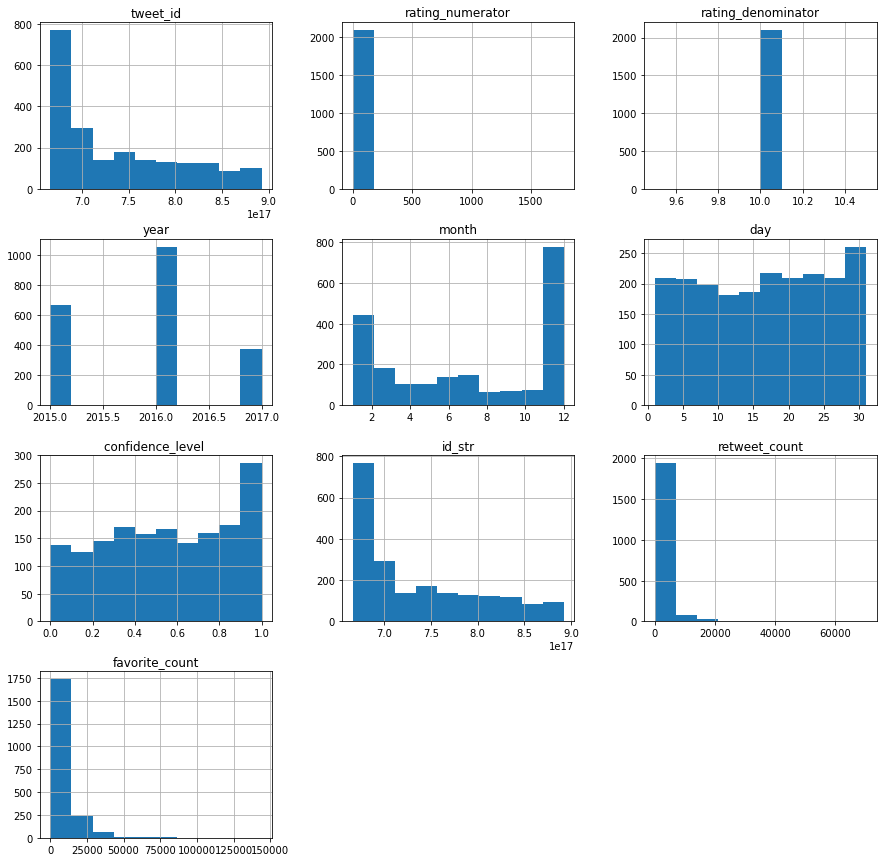

In [146]:
#Visualizing the whole dataset gives me a visual cue of the dataset.
twitter_archive_master.hist(figsize=(15, 15))

## 1. Which dog specie is the most reviewed by @dog_rates?

In [147]:
#Check the count for each dog type
twitter_archive_master['dog_type'].value_counts()

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
                     ... 
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
silky_terrier           1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

In [148]:
#Set seaborn figure style 
plt.style.use('seaborn-deep')

#Filter out top dog types
top_dog_type = twitter_archive_master.groupby('dog_type').filter(lambda x: len(x)>45)
top_dog_type['dog_type'].value_counts()

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Name: dog_type, dtype: int64

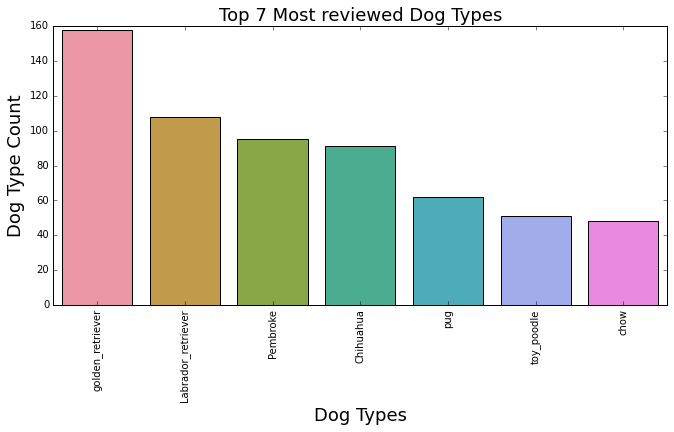

In [406]:
#plot the top 7 dog types against their count values
plt.figure(figsize = (11,5))
ax = sns.barplot(x = top_dog_type['dog_type'].value_counts()[0:10].index,
            y =top_dog_type['dog_type'].value_counts()[0:10],
            data = top_dog_type);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 10);
plt.xlabel("Dog Types",fontsize = 18);
plt.ylabel("Dog Type Count",fontsize = 18);
plt.title("Top 7 Most reviewed Dog Types",fontsize = 18);

**The golden_retriever dog has been most reviewed by @dog_rates. Other top reviewed species include Labrador_retriever, Pembroke, Chiuahua, Pug, Toy_poodle and Chow.** 

## 2. Which tweets received the highest number of likes and retweets?

In [149]:
#Show maximum retweet count
twitter_archive_master['retweet_count'].max()

70172.0

In [150]:
#Show maximum favourite count
twitter_archive_master['favorite_count'].max()

143987.0

In [151]:
#Show top 3 tweets by retweet count and favourite count
twitter_archive_master.sort_values(['retweet_count', 'favorite_count'],axis=0, ascending = False).head(3)



,tweet_id,timestamp,sources,text,rating_numerator,rating_denominator,name,dogs_stages,year,month,day,jpg_url,dog_type,confidence_level,created_at,id_str,retweet_count,favorite_count,lang
825,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10.0,None,None,2016,6,18,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,2016-06-18 18:26:18+00:00,7.442348e+17,70172.0,143987.0,en
864,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,13,10.0,None,None,2016,6,4,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog,0.503372,2016-06-04 23:31:25+00:00,7.392382e+17,52525.0,106596.0,en
419,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10.0,Stephan,None,2016,12,9,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,2016-12-09 06:17:20+00:00,8.071068e+17,51312.0,111001.0,en


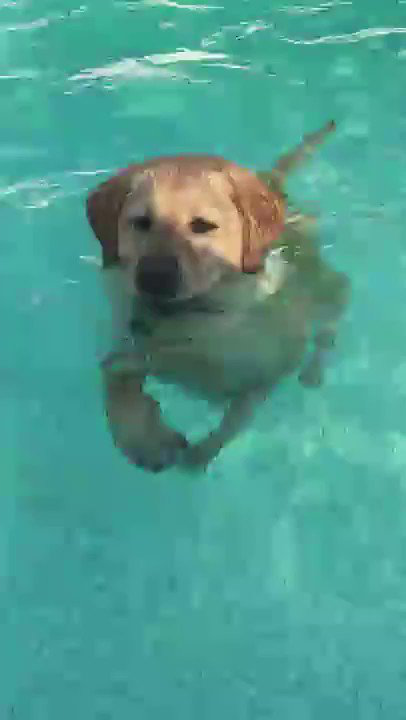

In [152]:
#Download dog image of tweet with highest retweet count
url = twitter_archive_master.jpg_url[825]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [153]:
#Identify dog type of top tweet
twitter_archive_master[twitter_archive_master['tweet_id']==744234799360020481].dog_type

825    Labrador_retriever
Name: dog_type, dtype: object

**The tweet with id 744234799360020481 scored the highest in both retweet and favorite count. As suspected, the dog with the highest number of likes and retweets is a Labrador_retriever. This dog is really loved. Rating more Labrador_retriever may increase interactions and follower count**

## 3. How has the tweet interaction been between fans and we rate dogs twitter account over the years?

In [154]:
#Tweet count per year
twitter_archive_master.groupby("year")['tweet_id'].count()

year
2015     668
2016    1054
2017     375
Name: tweet_id, dtype: int64

Text(0.5, 1.0, 'VOLUME OF TWEETS PER YEAR')

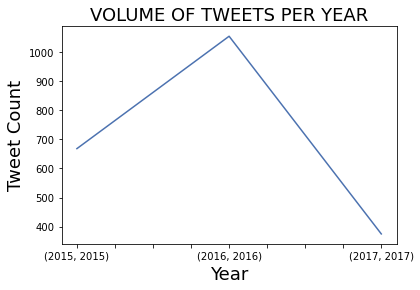

In [155]:
#Line plot showing tweet count per year vs each year
twitter_archive_master.groupby('year')['year'].value_counts().plot(kind='line')
plt.xlabel("Year",fontsize = 18);
plt.ylabel("Tweet Count",fontsize = 18);
plt.title("VOLUME OF TWEETS PER YEAR",fontsize = 18)

**A steady increase in the twitter interaction between fans and the we rate dogs account was observed between 2015 and 2016. However, a sharp decrease was observed from 2016 to 2017; falling below the level of interaction in 2015.**

In [156]:
#Make data of year column categorical
twitter_archive_master['year'] = twitter_archive_master['year'].astype('category')

Text(0.5, 1.0, 'VOLUME OF TWEETS PER YEAR')

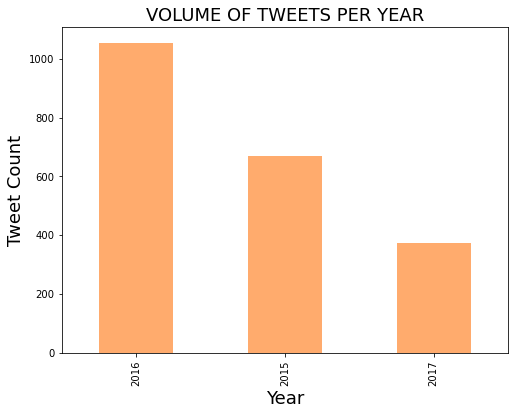

In [157]:
#Plot bar chart showing the volume of tweets per year
plt.figure(figsize=[8,6])
sns.set_palette('copper_r')


twitter_archive_master['year'].value_counts().sort_values(ascending= False).plot(kind="bar") 
plt.xlabel("Year",fontsize = 18);
plt.ylabel("Tweet Count",fontsize = 18);
plt.title("VOLUME OF TWEETS PER YEAR",fontsize = 18)

**The bar chart shows in descending order, the volume of tweet interactions generated. 2016 recorded the highest volume, followed by 2015 and 2017 recorded a lower user turnout. This may indicate a decline in interest, creating the need for the we rate dog account to find better ways to keep their fans interested** 

## 4. What month of the year had the highest tweet interaction? 

In [158]:
#Group tweets by month
twitter_archive_master.groupby("month")['tweet_id'].count()

month
1     252
2     189
3     184
4     102
5     102
6     138
7     147
8      63
9      69
10     72
11    350
12    429
Name: tweet_id, dtype: int64

Text(0.5, 1.0, 'VOLUME OF TWEETS PER MONTH(JANUARY TO DECEMBER)')

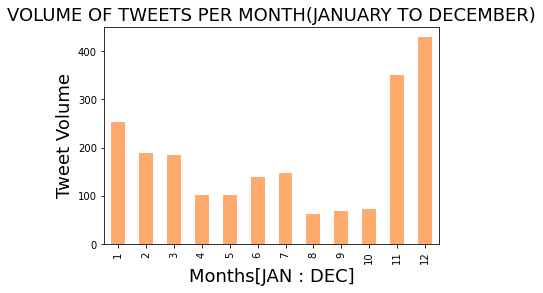

In [159]:
#Plot bar chart showing the volume of tweets per month
twitter_archive_master.groupby("month")['tweet_id'].count().plot(kind = 'bar')

plt.xlabel("Months[JAN : DEC]",fontsize = 18);
plt.ylabel("Tweet Volume",fontsize = 18);
plt.title("VOLUME OF TWEETS PER MONTH(JANUARY TO DECEMBER)",fontsize = 18)

 **The highest tweet interaction was observed in December. This can be noted as a peak period, and is likely due to the fact that it is the holiday season. It is important to focus on this period to maximize business profits and acount growth**

## 5. What language is most observed amongst we rate dog fans?

In [160]:
#Check the count for each language type
twitter_archive_master['lang'].value_counts()

en    2055
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

**I would love to further explore this, however, apart from English, other contents of this column are not descriptive enough**

## 6.  What is the major tweet source of fans of we rate dogs?

Text(0.5, 1.0, 'TWEET SOURCES')

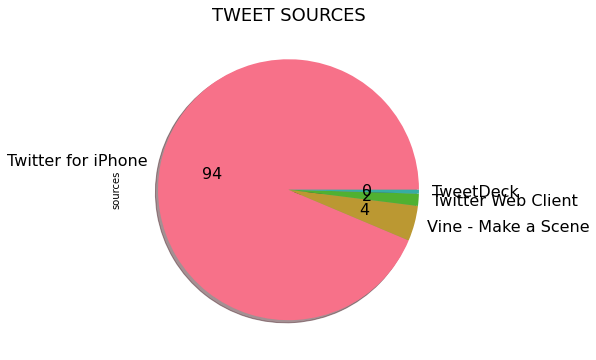

In [161]:
#Set seaborn colour pallete
colors = sns.color_palette('husl')[0:5] 

#Plot a pie chart of the different tweet sources
plt.figure(figsize=[8,6])
twitter_archive_master['sources'].value_counts().plot(kind="pie", colors = colors, autopct='%0.0f', 
                                       textprops={'fontsize': 16},  shadow=True) 


plt.title("TWEET SOURCES",fontsize = 18)

## 7. **Is there a relationship between the retweet count and favourite count**

Text(0.5, 1.0, 'FAVORITE COUNT vs. RETWEET COUNT')

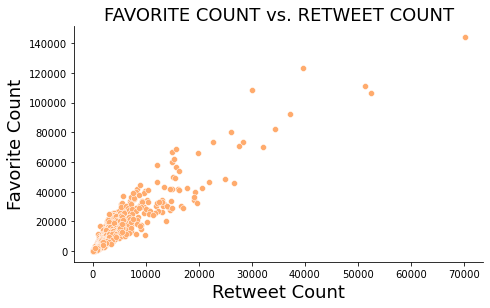

In [162]:
#Plot a scatter plot showing retweet count vs favorite count
sns.relplot(data=twitter_archive_master, x="retweet_count", y="favorite_count", kind="scatter", height=4, aspect=1.7)

plt.xlabel("Retweet Count",fontsize = 18);
plt.ylabel("Favorite Count",fontsize = 18);
plt.title("FAVORITE COUNT vs. RETWEET COUNT",fontsize = 18)

**A positive linear correlation is observed between the retweet count and favourite count. This means that both variables increase and decrease in the same direction.**

**This does not necessarily indicate a causal relationship between the favorite count and retweet count, however, finding a way to increase one variable may also lead to an increase in the second. This information can help trigger an overall growth in the number of we rate dog fans**

# Conclusion

The we rate dogs account which started as a joke has the potential to grow into a highly successful business and profit source for its owner. Today, social media has the ability to make or mar businesses; Its best resource: Individuals.
We rate dogs needs to focus on growing its amazing community of fans by innovative content which will keep everyone engaged, thus putting a stop to its declining interactions.
